# Association Rule Learning for Market Basket Analysis

**Business context**: A supermarket chain seeks to uncover frequent item combinations from historical transactions to improve product placement, plan promotions, and increase cross-selling.

*Dataset*: The Groceries dataset by **Hahsler et al. (2011)** contains 9,835 market basket transactions. Each row in the dataset represents items in a customer's basket (shopping cart).

## Step 1: Import the necessary libraries

**Purpose of chunk**

This chunk sets up all necessary tools for:
- Data manipulation (pandas)
- Market basket analysis as part of association rule learning (mlxtend)
- Data visualization (matplotlib/seaborn)
- Clean output management (warnings)

1. **pandas (`pd`)**
    - 'Pandas' is essential because it is used for:
        - Loading the CSV data (`pd.read_csv()`)
        - Data manipulation and analysis
        - Creating and managing DataFrames
        - Essential for structured data analysis, e.g., `Group By` operations

2. **`mlxtend` components**
    - `apriori`: Implements the Apriori algorithm for finding frequent itemsets
    - `association_rules`: Generates rules from frequent itemsets
    - `TransactionEncoder`: Converts transaction data into a binary matrix format

3. **Visualization Libraries**
    - `matplotlib.pyplot`: Basic plotting library
    - `seaborn` : Advanced statistical visualization built on matplotlib `seaborn`
    - Provides enhanced plotting capabilities with better default styling

4. **Import Statement**
    - Imports Python's built-in `urllib.request` module which has the `urlopen` function
    - `urlopen`: Provides functionality to fetch data from URLs where the data is not presented in a CSV file format

5. **Warnings Management**
    - `warnings`: Python's warning control mechanism
    - `warnings.filterwarnings('ignore')`: Suppresses warning messages

    - Used to suppress warnings that may arise during the execution of the code. Even though it is not necessary for the code to run, it helps in keeping the output clean and focused on the results.

In [23]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load the data

1. **Data Loading Process**
    - Uses a context manager (`with` statement) for proper resource handling
    - Steps:
        1. Opens URL connection
        2. Reads binary content
        3. Decodes from bytes to UTF-8 string
        4. Splits into lines and processes each line

2. **Data Processing**
    - List comprehension transforms raw data into a structured format
    - Each transaction is processed by:
        - `strip()`: Removes whitespace
        - `split(',')`: Creates a list of items from comma-separated values

3. **Output**
    - Prints the total number of transactions
    - Shows the first three transactions as a sample


In [24]:
# Load transaction data (each line is a basket)
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/groceries.csv'

# Read data from URL using urlopen
with urlopen(url) as response:
    # Decode the bytes to string and split into lines
    content = response.read().decode('utf-8')
    transactions = [line.strip().split(',') for line in content.splitlines()]

print(f"Total number of transactions: {len(transactions)}")
print("\nFirst three transactions:")
transactions[:3]

Total number of transactions: 9835

First three transactions:


[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk']]

## Step 3: Convert the transaction list into a one-hot encoded DataFrame

**Purpose:**

The purpose of this chunk is to format the transaction data correctly. This is essential for:
- Running the Apriori algorithm
- Computing association rules
- Analyzing item frequencies and relationships

1. **Transaction Encoder Initialization**
    - Creates a new object `TransactionEncoder`
    - Purpose: To convert transaction lists into a binary matrix format

2. **Fit and Transform Process**
    - `encoder.fit(transactions)`:
        - Learns all unique items across all transactions
        - Creates a mapping of items to columns

    - `transform(transactions)`:
        - Converts transactions into a binary matrix
        - Each row represents one transaction
        - Each column represents one item
        - Values: True/False indicating item presence

3. **DataFrame Creation**
    - Converts the binary matrix into a `pandas` DataFrame
    - Uses `encoder.columns_` to retrieve the column names
    - Each column name is a unique item
    - Each row shows items present (True) or absent (False)

4. **Data Preview**
    - `transaction_data.head()`: Shows first five rows of transformed data

**Example:**
If the original transactions were:
```
Transaction 1: ["milk", "bread"]
Transaction 2: ["bread", "butter"]
```
The transformed data would look like this:
```
   milk  bread  butter
0  True   True  False
1  False  True   True
```

In [28]:
encoder = TransactionEncoder()
onehot = encoder.fit(transactions).transform(transactions)
transaction_data = pd.DataFrame(onehot, columns=encoder.columns_)
transaction_data.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Step 4: Generate frequent itemsets using the Apriori algorithm

1. **Apriori Algorithm Application**
    - Function: `apriori()`
    - Parameters:
        - `transaction_data`: Binary encoded transaction matrix
        - `min_support=0.02`: Minimum support threshold (2%)
        - `use_colnames=True`: Use item names instead of indices

2. **Support Threshold**
    - Support = (frequency of itemset) / (total transactions)
    - 0.02 means items/sets must appear in at least 2% of transactions
    - Helps filter out rare combinations

3. **Result Generation**
    - Creates a DataFrame containing:
        - `itemsets`: Combinations of items
        - `support`: Frequency of occurrence

4. **Result Processing**
    - `sort_values(by='support', ascending=False)`: Orders by support value (highest first)
    - `head(10)`: Shows top 10 most frequent itemsets


In [34]:
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False).head(10)

,support,itemsets
57,0.255516,(whole milk)
39,0.193493,(other vegetables)
43,0.183935,(rolls/buns)
49,0.174377,(soda)
58,0.139502,(yogurt)
5,0.110524,(bottled water)
44,0.108998,(root vegetables)
53,0.104931,(tropical fruit)
47,0.098526,(shopping bags)
46,0.093950,(sausage)


## Step 5: Generate and display the association rules

1. **Rules Generation**
    - Function: `association_rules()`
    - Input: `frequent_itemsets` from Apriori algorithm
    - Parameters:
        - `metric='lift'`: Measure of rule interestingness
        - `min_threshold=1.0`: Minimum lift value to include

2. **Key Metrics**
    - `antecedents`: "If" part of the rule (items in basket)
    - `consequents`: "Then" part of the rule (likely additional items)
    - `support`: Frequency of items appearing together
    - `confidence`: Probability of consequent given antecedent
    - `lift`: Ratio of observed support to expected support

3. **Sorting and Display**
    - Sorts rules by confidence (highest first)
    - Shows the top 15 strongest associations
    - Displays most relevant columns for analysis


In [49]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

### Display the top 10 rules sorted by confidence

In [51]:
rules = rules.sort_values(by='confidence', ascending=False)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
121,"(yogurt, other vegetables)",(whole milk),0.022267,0.512881,2.007235
16,(butter),(whole milk),0.027555,0.497248,1.946053
25,(curd),(whole milk),0.026131,0.490458,1.919481
115,"(root vegetables, other vegetables)",(whole milk),0.023183,0.489270,1.914833
114,"(root vegetables, whole milk)",(other vegetables),0.023183,0.474012,2.449770
29,(domestic eggs),(whole milk),0.029995,0.472756,1.850203
108,(whipped/sour cream),(whole milk),0.032232,0.449645,1.759754
90,(root vegetables),(whole milk),0.048907,0.448694,1.756031
50,(root vegetables),(other vegetables),0.047382,0.434701,2.246605
32,(frozen vegetables),(whole milk),0.020437,0.424947,1.663094


### Display the top 10 rules sorted by lift and then confidence

In [50]:
rules = rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
116,"(whole milk, other vegetables)",(root vegetables),0.023183,0.309783,2.842082
117,(root vegetables),"(whole milk, other vegetables)",0.023183,0.212687,2.842082
71,(pip fruit),(tropical fruit),0.020437,0.270161,2.574648
70,(tropical fruit),(pip fruit),0.020437,0.194767,2.574648
114,"(root vegetables, whole milk)",(other vegetables),0.023183,0.474012,2.449770
119,(other vegetables),"(root vegetables, whole milk)",0.023183,0.119811,2.449770
51,(other vegetables),(root vegetables),0.047382,0.244877,2.246605
50,(root vegetables),(other vegetables),0.047382,0.434701,2.246605
122,"(whole milk, other vegetables)",(yogurt),0.022267,0.297554,2.132979
123,(yogurt),"(whole milk, other vegetables)",0.022267,0.159621,2.132979


### Filter the rules to show only those with high confidence and high lift

In [67]:
strong_rules = rules[
    (rules['confidence'] >= 0.2) &
    (rules['lift'] >= 2.0)
].sort_values(by='confidence', ascending=False)
strong_rules.head(15)[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
121,"(yogurt, other vegetables)",(whole milk),0.022267,0.512881,2.007235
114,"(root vegetables, whole milk)",(other vegetables),0.023183,0.474012,2.449770
50,(root vegetables),(other vegetables),0.047382,0.434701,2.246605
58,(whipped/sour cream),(other vegetables),0.028876,0.402837,2.081924
120,"(yogurt, whole milk)",(other vegetables),0.022267,0.397459,2.054131
116,"(whole milk, other vegetables)",(root vegetables),0.023183,0.309783,2.842082
122,"(whole milk, other vegetables)",(yogurt),0.022267,0.297554,2.132979
111,(whipped/sour cream),(yogurt),0.020742,0.289362,2.074251
106,(tropical fruit),(yogurt),0.029283,0.279070,2.000475
71,(pip fruit),(tropical fruit),0.020437,0.270161,2.574648


## Step 6. Visualize rules

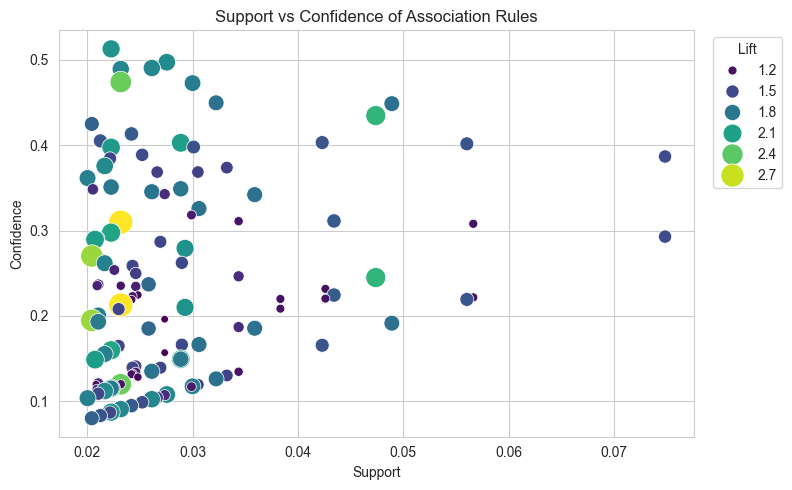

In [54]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='viridis', sizes=(30, 300))
plt.title('Support vs Confidence of Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.legend(title='Lift', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.tight_layout()
plt.show()

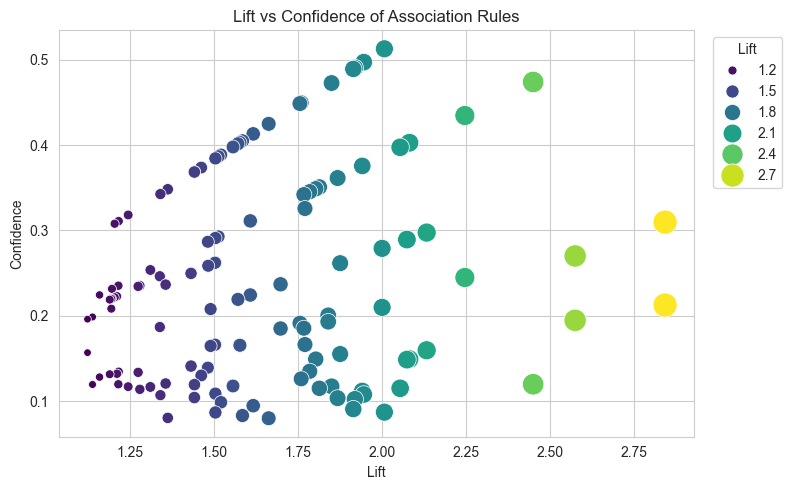

In [66]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=rules, x='lift', y='confidence', size='lift', hue='lift', palette='viridis', sizes=(30, 300))
plt.title('Lift vs Confidence of Association Rules')
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.grid(True)
plt.legend(title='Lift', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.tight_layout()
plt.show()

## Step 7. Business Analysis
- Rules such as `(yogurt, other vegetables) → (whole milk)` and `(root vegetables, whole milk) → (other vegetables)` provide actionable insights for store layout, website layout, and promotions.
- High lift values suggest strong associations which can guide bundling decisions.
- Regular analysis of basket data helps optimize product placement and increase average basket size.

# References
Hahsler, M., Chelluboina, S., Hornik, K., & Buchta, C. (2011). The arules R-Package Ecosystem: Analyzing Interesting Patterns from Large Transaction Datasets. Journal of Machine Learning Research, 12, 1977–1981.
